# Notebook :interpr√©tation des r√©sultats (analyse_yolo)

In [ ]:
# --- 1 : Imports et config ---
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

sns.set(style="whitegrid") # Style seaborn pour les graphiques

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# --- Cellule 2 : Charger les r√©sultats d‚Äôentra√Ænement ---
# le chemin vers dossier
csv_files = glob.glob("./resultat/train*/results.csv")
print("Fichiers trouv√©s :", csv_files)

results = {}
for path in csv_files:
    model_name = os.path.basename(os.path.dirname(path))  # nom du dossier du mod√®le
    results[model_name] = pd.read_csv(path)

# Aper√ßu d'un DataFrame
results[list(results.keys())[0]].head()

Fichiers trouv√©s : ['./resultat/train_y-8n_nvp/results.csv', './resultat/train_y_8n/results.csv', './resultat/train_y_9s/results.csv', './resultat/train_y_8n_da/results.csv', './resultat/train_y_8s/results.csv']


epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  11.9747         2.12093         3.53352         1.97959   
1      2  20.0067         1.87750         2.93490         1.81976   
2      3  27.4375         1.89733         2.81487         1.82859   
3      4  35.8743         1.92662         2.72690         1.85414   
4      5  44.0148         1.91318         2.58888         1.77177   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00962            0.69231           0.11326   
1               0.57493            0.04945           0.13795   
2               0.34001            0.18681           0.16999   
3               0.15133            0.13736           0.07171   
4               0.18753            0.18132           0.09338   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.06451       1.88484       3.33120       1.86822  0.000367   
1              0.06525       1.96610       3.09829       1.79524  0.000743   
2              0.08238       1.91167       2.73130       1.95508  0.001111   
3              0.02562       2.59089       5.75914       2.58960  0.001472   
4              0.04302       2.25199       3.73712       2.19572  0.001601   

     lr/pg1    lr/pg2  
0  0.000367  0.000367  
1  0.000743  0.000743  
2  0.001111  0.001111  
3  0.001472  0.001472  
4  0.001601  0.001601

 
 **train_y_8n:** c'est le modele yolov8n

 **train_y-8n_nvp:** c'est le modele yolov8n avec changement des param√©tres

 **train_y_8n_da:** yolov8n apres le data augementation

 **train_y_9s:** YOLOv9 avec le data augementation
 
 **train_y_8s:** c'est le modele yolo8s sans data augementation

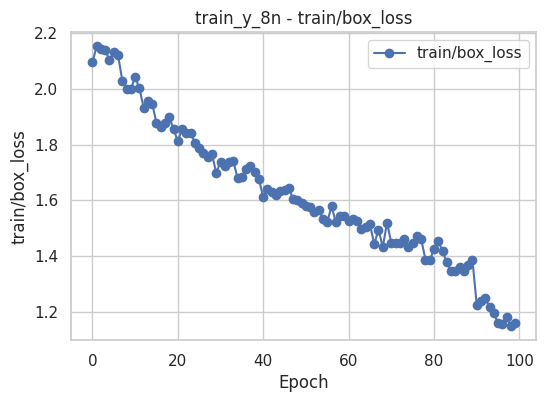

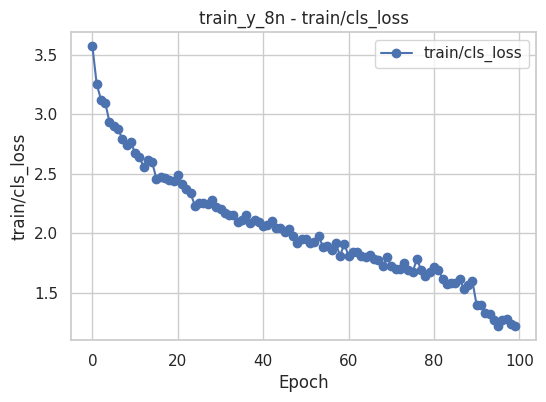

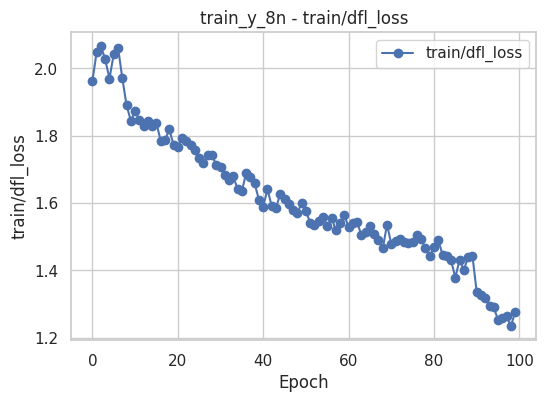

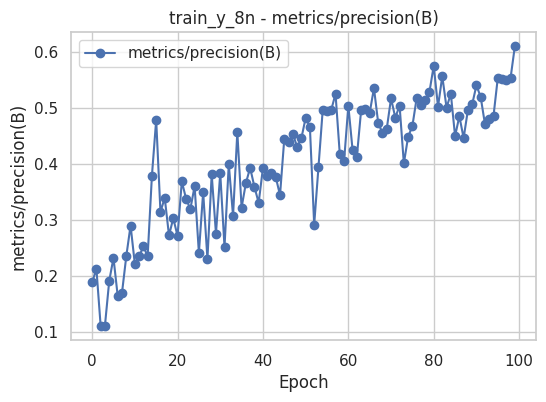

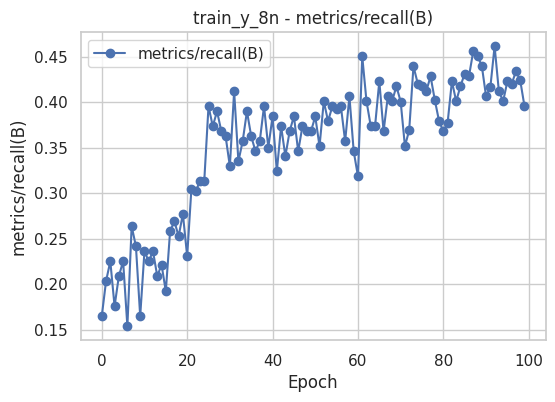

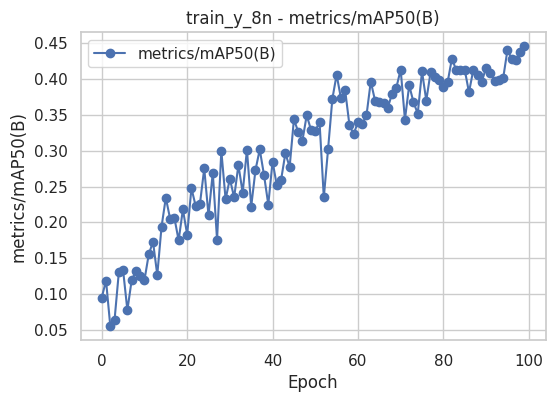

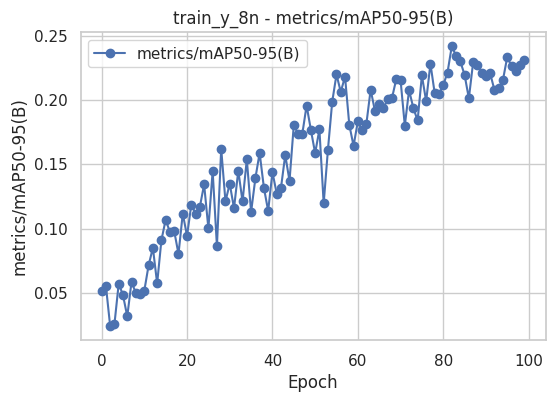

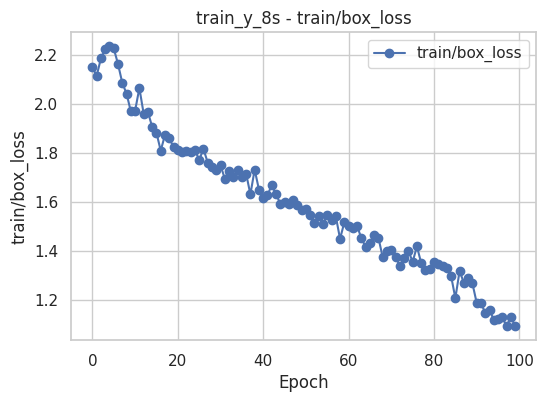

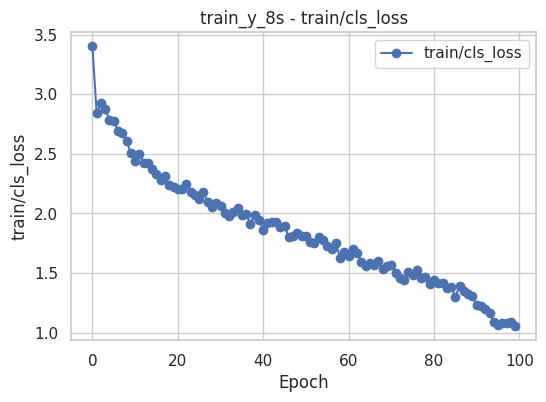

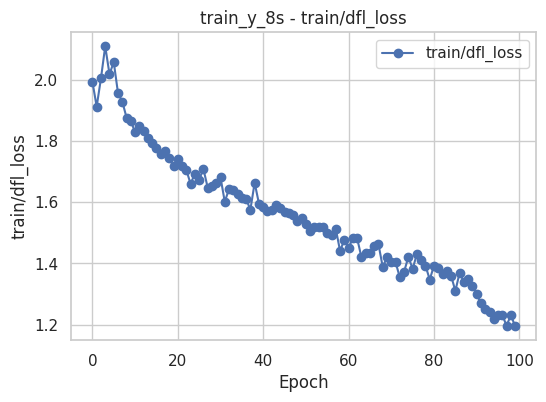

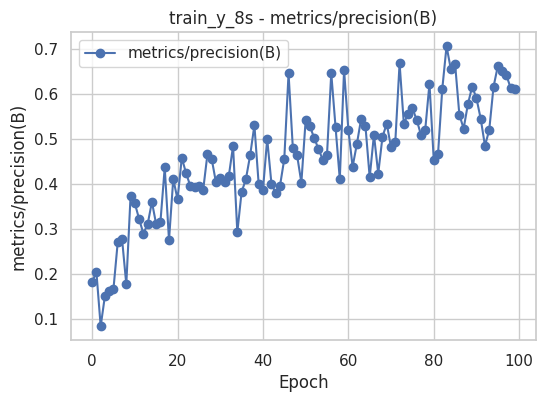

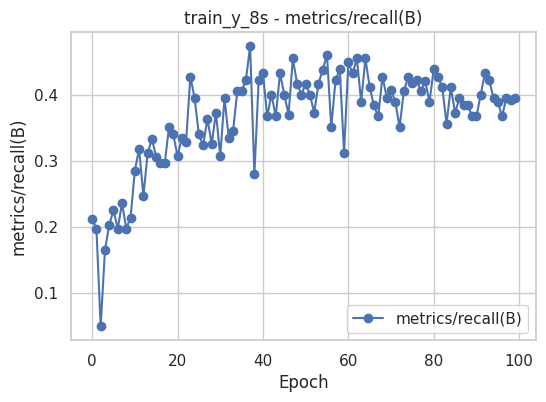

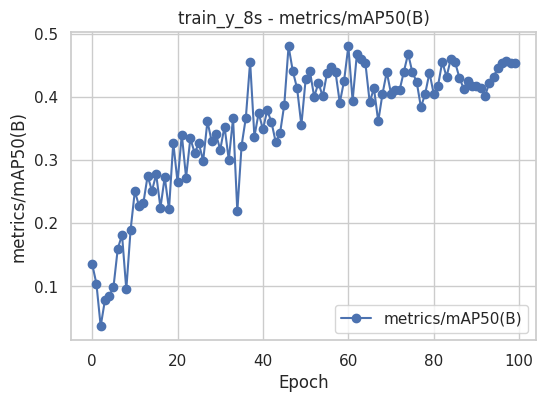

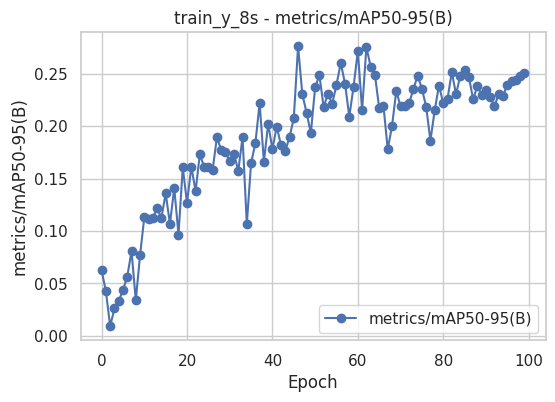

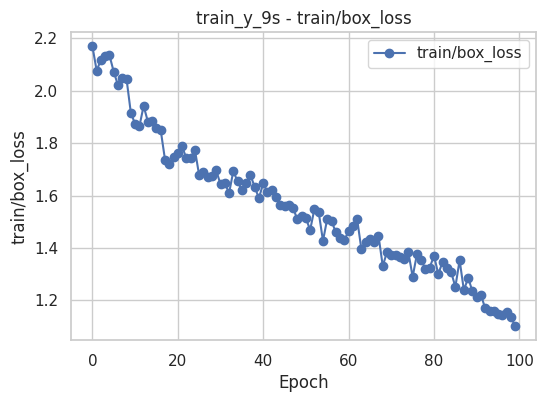

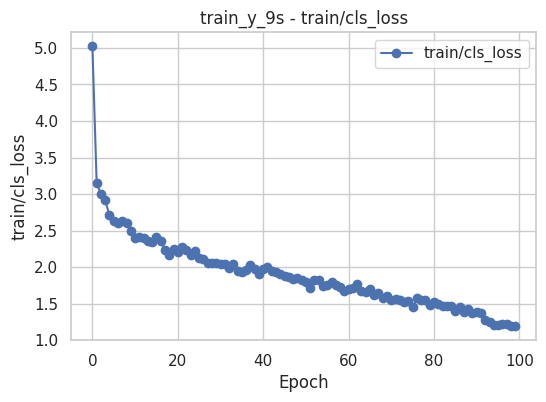

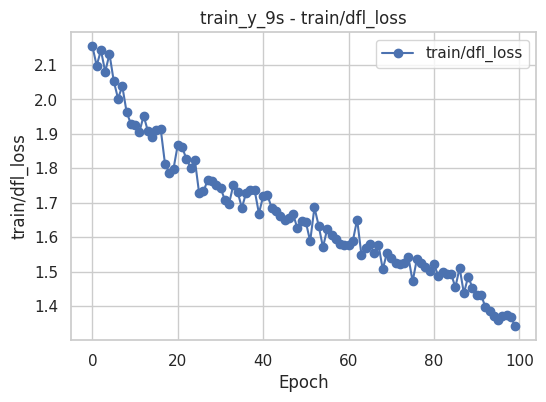

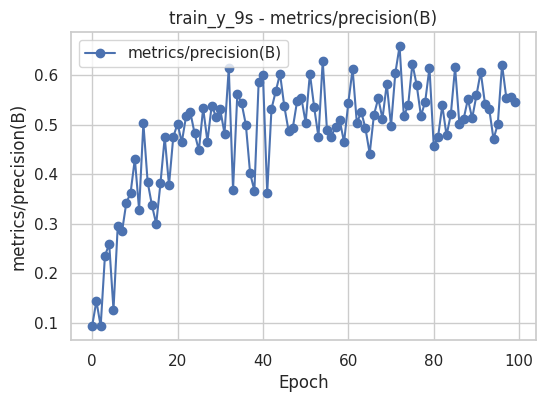

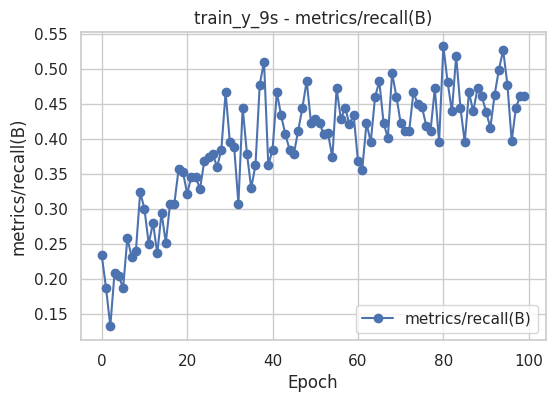

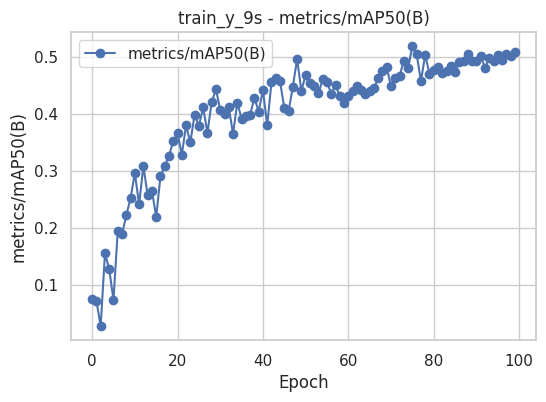

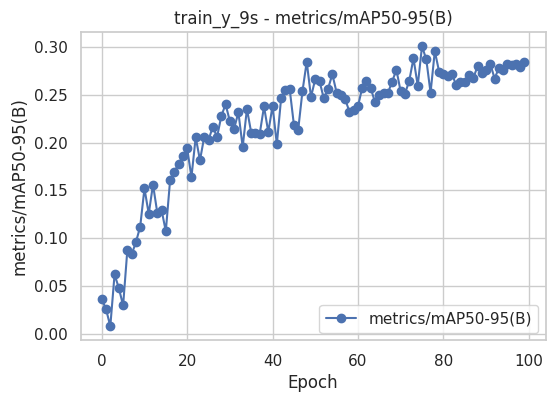

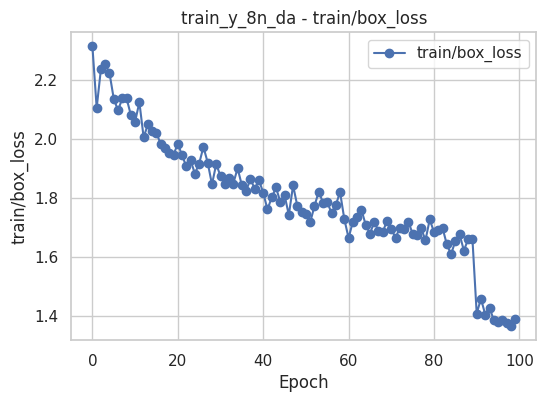

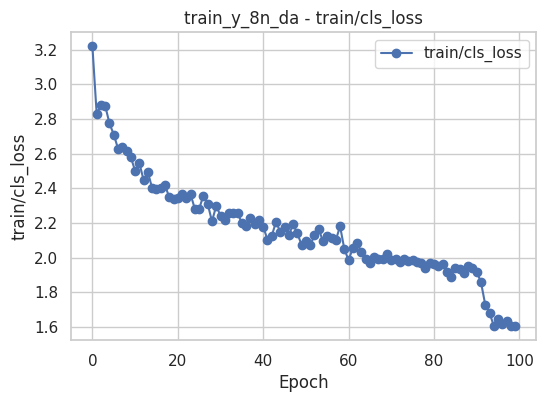

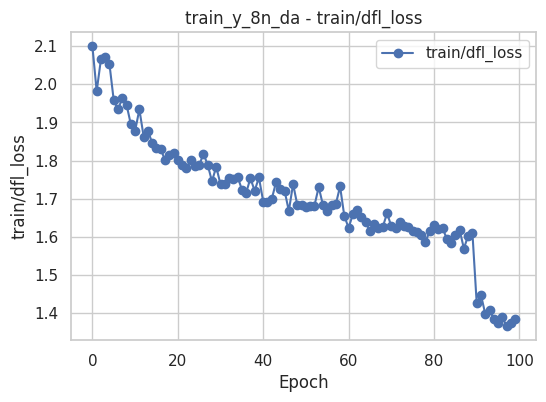

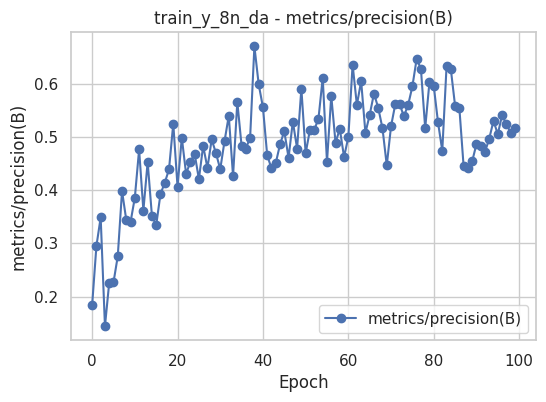

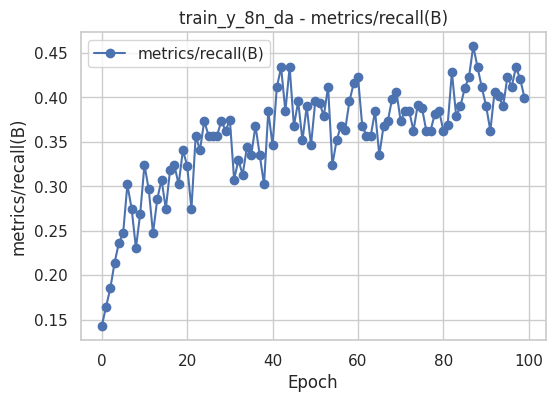

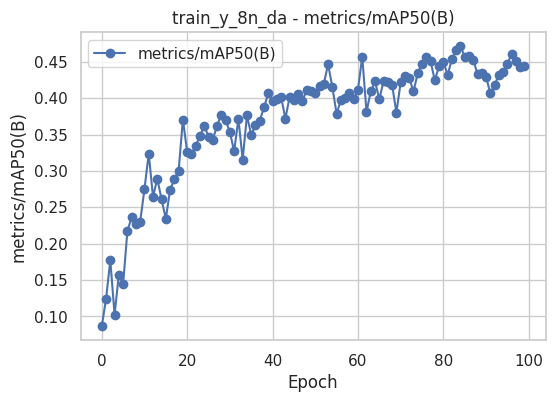

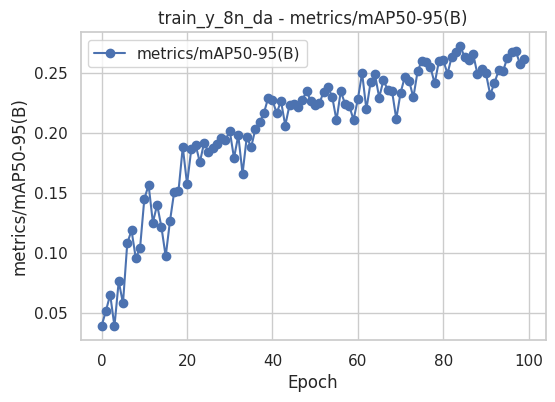

In [39]:
# --- Cellule 3 : Visualiser les m√©triques au cours de l‚Äôentra√Ænement ---
def plot_metrics(df, model_name):
    metrics = ["train/box_loss", "train/cls_loss", "train/dfl_loss", 
            "metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]
    
    for col in metrics:
        if col in df.columns:
            plt.figure(figsize=(6,4))
            plt.plot(df.index, df[col], marker="o", label=col)
            plt.title(f"{model_name} - {col}")
            plt.xlabel("Epoch")
            plt.ylabel(col)
            plt.legend()
            plt.show()

# Exp mod√®le
plot_metrics(results["train_y_8n"], "train_y_8n")
plot_metrics(results["train_y_8s"], "train_y_8s")
plot_metrics(results["train_y_9s"], "train_y_9s")
plot_metrics(results["train_y_8n_da"], "train_y_8n_da")

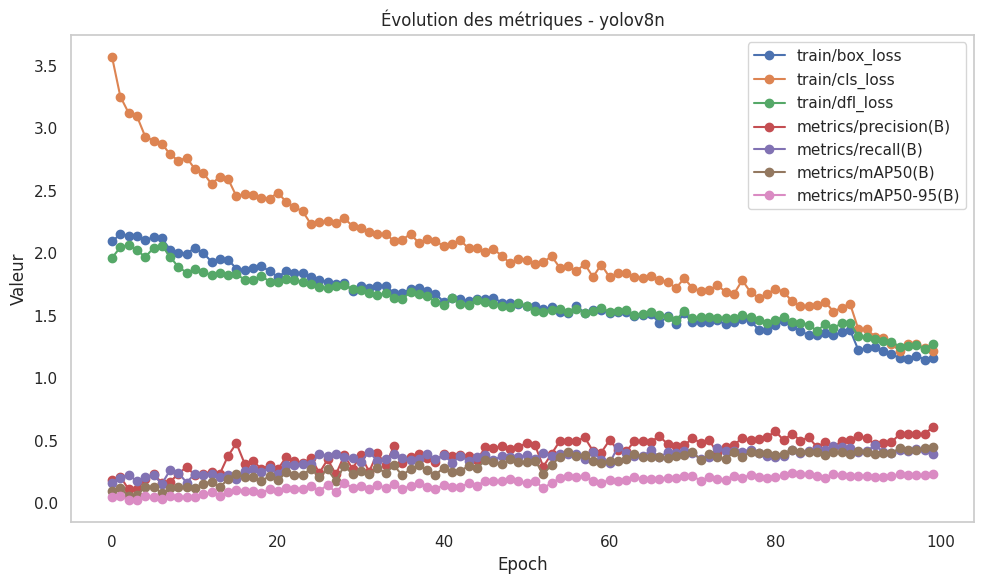

‚úÖ Graphique sauvegard√© : result_8n.png


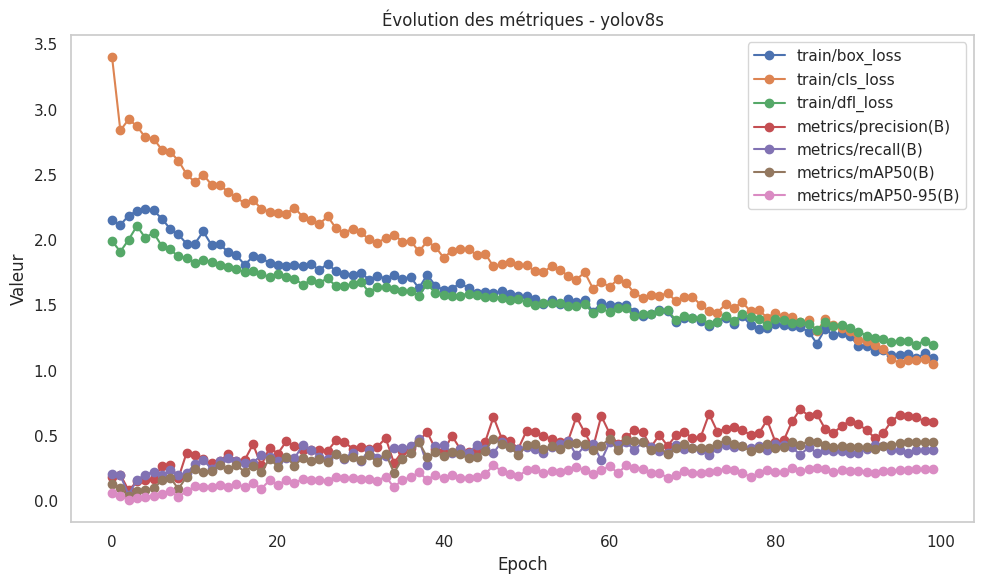

‚úÖ Graphique sauvegard√© : result_8s.png


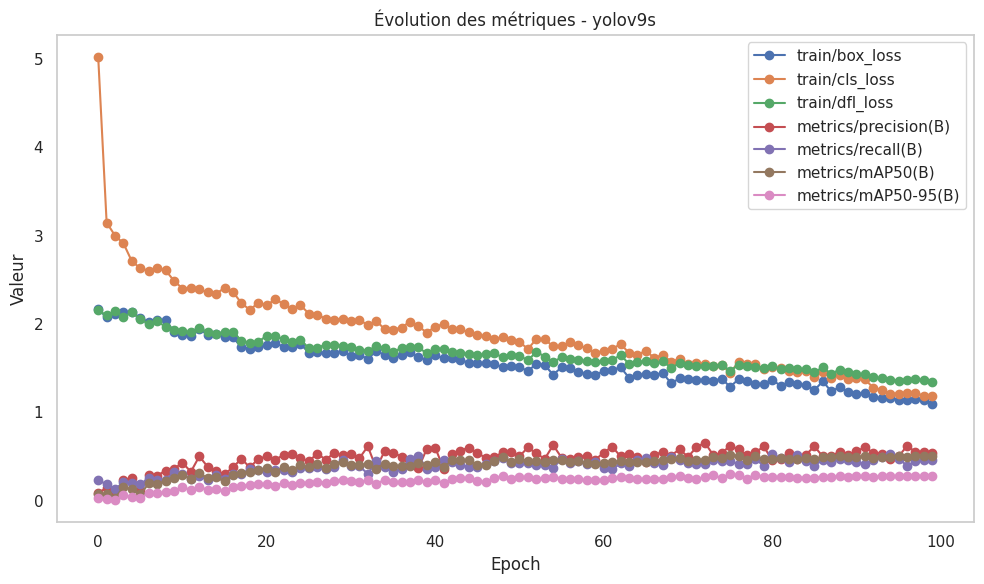

‚úÖ Graphique sauvegard√© : result_9s.png


In [ ]:
# --- Visualiser toutes les m√©triques dans un seul graphique ---
import matplotlib.pyplot as plt

def plot_all_metrics(df, model_name, save_path="result.png"):
    metrics = [
        "train/box_loss", 
        "train/cls_loss", 
        "train/dfl_loss", 
        "metrics/precision(B)", 
        "metrics/recall(B)", 
        "metrics/mAP50(B)", 
        "metrics/mAP50-95(B)"
    ]
    
    plt.figure(figsize=(10,6))
    
    for col in metrics:
        if col in df.columns:
            plt.plot(df.index, df[col], marker="o", label=col)
    
    plt.title(f"√âvolution des m√©triques - {model_name}")
    plt.xlabel("Epoch")
    plt.ylabel("Valeur")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f" Graphique sauvegard√© : {save_path}")


results_8n = pd.read_csv("./resultat/train_y_8n/results.csv")
results_8s = pd.read_csv("./resultat/train_y_8s/results.csv")
results_9s = pd.read_csv("./resultat/train_y_9s/results.csv")

plot_all_metrics(results_8n, "yolov8n", "result_8n.png")
plot_all_metrics(results_8s, "yolov8s", "result_8s.png")
plot_all_metrics(results_9s, "yolov9s", "result_9s.png")



In [ ]:
# --- Cellule 4 : 1 Comparer les mod√®les sur les derni√®res m√©triques(last epoch) ---
summaries = []
for model_name, df in results.items():
    last = df.iloc[-1]  
    summaries.append({
        "model": model_name,
        "epochs": len(df),
        "precision": last.get("metrics/precision(B)", None),
        "recall": last.get("metrics/recall(B)", None),
        "mAP50": last.get("metrics/mAP50(B)", None),
        "mAP50-95": last.get("metrics/mAP50-95(B)", None)
    })

df_summary = pd.DataFrame(summaries)
df_summary


model  epochs  precision   recall    mAP50  mAP50-95
0  train_y-8n_nvp     100    0.50885  0.46703  0.44601   0.24333
1      train_y_8n     100    0.61089  0.39560  0.44557   0.23108
2      train_y_9s     100    0.54537  0.46154  0.50996   0.28385
3   train_y_8n_da     100    0.51672  0.39948  0.44494   0.26130
4      train_y_8s     100    0.61076  0.39560  0.45417   0.25079

In [ ]:
# --- Cellule 4 : 2 Comparer les mod√®les sur les m√©triques ---

#
best_summaries = []
mean_summaries = []

for model_name, df in results.items():
    
    # --- Meilleur epoch (par mAP50) ---
    if "metrics/mAP50(B)" in df.columns:
        best_idx = df["metrics/mAP50(B)"].idxmax()
        best = df.iloc[best_idx]
        best_summaries.append({
            "model": model_name,
            "epochs": len(df),
            "precision": best.get("metrics/precision(B)", None),
            "recall": best.get("metrics/recall(B)", None),
            "mAP50": best.get("metrics/mAP50(B)", None),
            "mAP50-95": best.get("metrics/mAP50-95(B)", None)
        })
    
    # --- Moyenne sur toutes les epochs ---
    
    mean_summaries.append({
        "model": model_name,
        "epochs": len(df),
        "precision": df["metrics/precision(B)"].mean() if "metrics/precision(B)" in df.columns else None,
        "recall": df["metrics/recall(B)"].mean() if "metrics/recall(B)" in df.columns else None,
        "mAP50": df["metrics/mAP50(B)"].mean() if "metrics/mAP50(B)" in df.columns else None,
        "mAP50-95": df["metrics/mAP50-95(B)"].mean() if "metrics/mAP50-95(B)" in df.columns else None
    })

df_best = pd.DataFrame(best_summaries)
df_mean = pd.DataFrame(mean_summaries)

print("=== Meilleur Epoch ===")
display(df_best)

print("=== Moyenne Epochs ===")
display(df_mean)



=== Meilleur Epoch ===


model  epochs  precision   recall    mAP50  mAP50-95
0  train_y-8n_nvp     100    0.59958  0.45604  0.48003   0.25917
1      train_y_8n     100    0.61089  0.39560  0.44557   0.23108
2      train_y_9s     100    0.62344  0.44575  0.51929   0.30074
3   train_y_8n_da     100    0.62777  0.39011  0.47145   0.27213
4      train_y_8s     100    0.52105  0.45055  0.47990   0.27153

=== Moyenne Epochs ===


model  epochs  precision    recall     mAP50  mAP50-95
0  train_y-8n_nvp     100   0.481323  0.388351  0.371917  0.199537
1      train_y_8n     100   0.402252  0.351817  0.299935  0.156577
2      train_y_9s     100   0.483091  0.390575  0.401727  0.219868
3   train_y_8n_da     100   0.483515  0.354784  0.371320  0.204477
4      train_y_8s     100   0.456760  0.365465  0.355222  0.187120

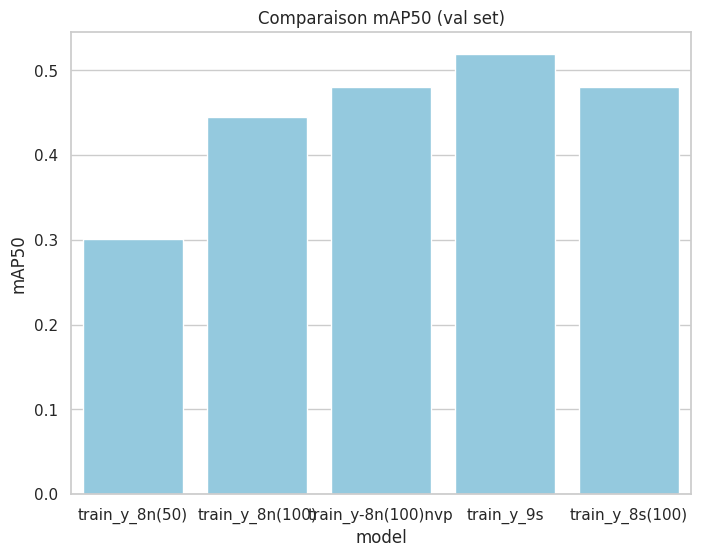

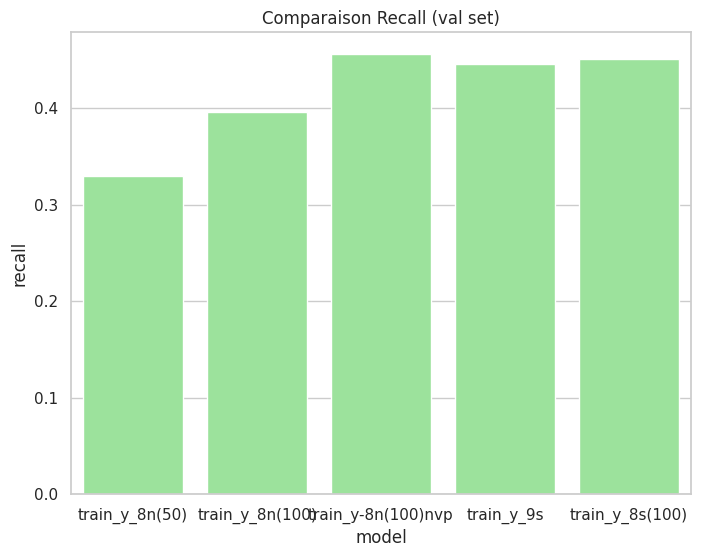

In [34]:
# --- Cellule 5 : Visualisation comparative ---
plt.figure(figsize=(8,6))
sns.barplot(data=df_best, x="model", y="mAP50", color="skyblue")
plt.title("Comparaison mAP50 (val set)")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(data=df_best, x="model", y="recall", color="lightgreen")
plt.title("Comparaison Recall (val set)")
plt.show()

In [ ]:
# --- Cellule 7 : Interpr√©tation et ---
print("""
üîé Interpr√©tation (√† compl√©ter) :
- Si recall est bas ‚Üí mod√®le rate des zones br√ªl√©es ‚Üí augmenter epochs, augmenter imgsz
- Si precision est basse ‚Üí trop de fausses alertes ‚Üí v√©rifier annotations, augmenter batch
- Si mAP50 est √©lev√© mais mAP50-95 faible ‚Üí bo√Ætes impr√©cises ‚Üí augmenter imgsz
- V√©rifier si le mod√®le overfit (gap train/val) ‚Üí appliquer data augmentation, r√©duire learning rate
""")

# Interpr√©tation des r√©sultats

## 1. Comparaison globale entre mod√®les

- **YOLOv9s (train_y_9s)** obtient les **meilleures performances globales** :  
  - Pr√©cision ‚âà **0.62**  
  - Rappel ‚âà **0.44**  
  - mAP50 ‚âà **0.52**  
  - mAP50-95 ‚âà **0.30**  
  =>Cela montre que l‚Äôarchitecture **v9** est plus adapt√©e que **v8** sur ton dataset.

- **YOLOv8n avec data augmentation (train_y_8n_da)**  
  =>Am√©liore l√©g√®rement le **mAP50** et **mAP50-95** par rapport √† YOLOv8n pur,  
  mais le **rappel reste bas (~0.39)**.  
  =>L‚Äôaugmentation aide √† mieux g√©n√©raliser, mais ne corrige pas totalement le probl√®me de d√©tection des zones rat√©es.

- **YOLOv8s (train_y_8s)**  
  =>Rappel meilleur que YOLOv8n,  
  mais pr√©cision plus faible ‚Üí **plus de fausses d√©tections**.

---

## 2. Analyse par m√©triques

- **Recall assez bas (<0.46 pour tous les mod√®les)**  
  =>Le mod√®le rate beaucoup de zones br√ªl√©es.  
    Solutions possibles :  
  - Augmenter le nombre d‚Äô**epochs** (100 peut √™tre trop peu si dataset complexe).  
  - Augmenter **imgsz** (ex. 640 ou 768 au lieu de 512).  
  - on doit V√©rifier si certaines **annotations sont manquantes ou incoh√©rentes**.  

- **Precision correcte (~0.60 pour YOLOv8/9n, mais baisse sur YOLOv8s)**  
  =>YOLOv8n/9s limitent les fausses alertes, YOLOv8s est moins stable.  
  =>V√©rifier si certaines classes sont **surrepr√©sent√©es** dans les donn√©es.  

- **mAP50 correct (>0.47 pour les meilleurs mod√®les), mais mAP50-95 bas (~0.25‚Äì0.30)**  
  =>Le mod√®le trouve les zones, mais les bo√Ætes englobantes manquent de pr√©cision.  
  

- **Overfitting ?**  
  ‚Üí √Ä v√©rifier en comparant **train vs val**.  
  ‚Üí D‚Äôapr√®s les r√©sultats, pas de surapprentissage clair ‚Üí plut√¥t **manque de puissance du mod√®le / dataset limit√©**.  

---

## 3. Impact de la data augmentation

- Sur **YOLOv8n**, la data augmentation augmente l√©g√®rement le **mAP50-95 (0.23 ‚Üí 0.27)**.  
- Le **recall reste faible**, mais √ßa aide √† r√©duire un peu le surapprentissage.  

 Conclusion : la **data augmentation aide, mais n‚Äôest pas suffisante seule**.

---

## 4. pistes 

 Augmenter la taille des images (**imgsz=640 ou 768**)  
Augmenter le nombre d‚Äô**epochs** (200 ou plus)  
Tester des mod√®les plus puissants (**YOLOv9m, YOLOv8m**)  
 V√©rifier la **qualit√©/√©quilibre du dataset** (zones bien annot√©es, pas de bruit)  
Ajouter de la **data augmentation sp√©cifique aux images satellites**  
